### Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



In [2]:
# Load dataset
data = pd.read_csv("../data/Mall_Customers.csv")
print(data.head())
print(data.info())
print(data.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [3]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
data.drop('CustomerID',axis=1,inplace=True)

### Data Visualization and EDA 

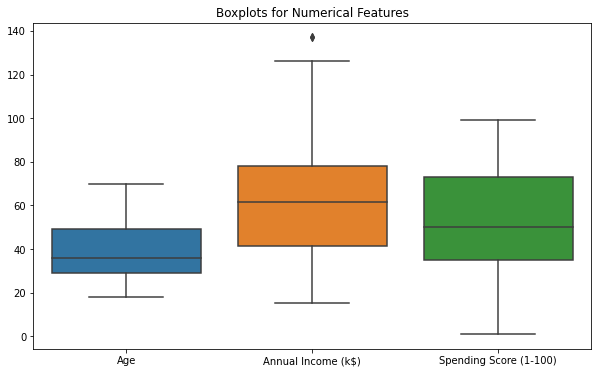

In [5]:
#Box plot to detect outliars 

plt.figure(figsize=(10,6))
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplots for Numerical Features')
plt.show()

The Z-score for each feature and identify data points that are far from the mean ( data points with Z-scores greater than 3 or less than -3 are outliers).

In [6]:
from scipy.stats import zscore

z_scores = zscore(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
outliers = (z_scores > 3) | (z_scores < -3)

print("Outliers in each column:")
print(outliers.sum())


Outliers in each column:
0


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


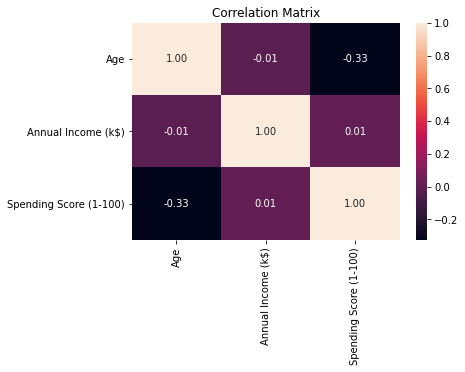

In [7]:
# Feature Corelation 

correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].corr()
print(correlation_matrix)


sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Next we need to see the distribution of  features to see if any transformation might be needed, or if they are skewed ( log-transform for highly skewed data)

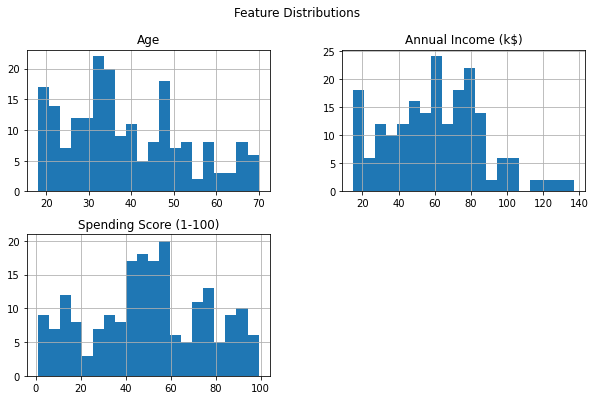

In [8]:
# Histograms for numerical features
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(figsize=(10, 6), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


Observation : The data is not scewed

### Data Preprocessing

In [9]:
encoder = OneHotEncoder(drop='first')
gender_encoded = encoder.fit_transform(data[['Gender']]).toarray()
#print(gender_encoded)
data[['Male']] = gender_encoded

data.drop('Gender',axis=1,inplace = True)

In [10]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


**Data Scaling**

Clustering algorithms like K-Means are sensitive to the scale of the features. So, we should scale the continuous features (like Age, Annual Income, and Spending Score) to ensure that all features contribute equally. 

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Male']])

In [12]:
scaled_data[:10,:4]

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526]])

### Model building 

K-Means Clustering: 
 
  We'll apply K-Means clustering to group  customers into clusters. First, we need to determine the optimal number of clusters using the elbow method, and then we'll fit the K-Means algorithm.

Elbow Method:

 The elbow method helps  determine the optimal number of clusters by plotting the distortion (within-cluster sum of squares) for different values of kk. The idea is to choose the k at which the distortion starts to level off (forming an "elbow").

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

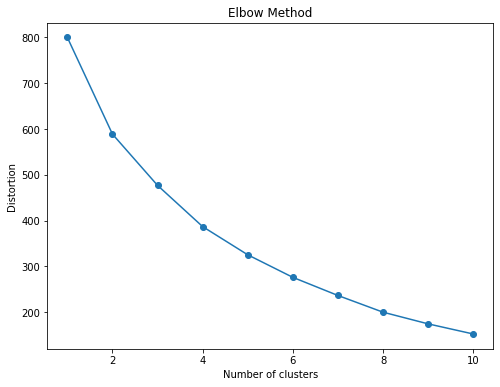

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the distortions for different values of k
distortions = []

# Test k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


We see there's a slight elbow at 4 . we can go ahead with it or we can do a **Silhuette test** which is used when the elbow method doesn't yield a clear result

In [15]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette score for k values from 2 to 35
for k in range(2, 35):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, clusters)
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.2518152915788437
Silhouette Score for k=3: 0.25951265087431563
Silhouette Score for k=4: 0.3016237438985175
Silhouette Score for k=5: 0.31709067955763137
Silhouette Score for k=6: 0.3336281031933481
Silhouette Score for k=7: 0.3573771582429211
Silhouette Score for k=8: 0.3873969164416463
Silhouette Score for k=9: 0.4022520246824372
Silhouette Score for k=10: 0.4203423769946011
Silhouette Score for k=11: 0.4273168801169479
Silhouette Score for k=12: 0.42542960188176976
Silhouette Score for k=13: 0.4276147489691928
Silhouette Score for k=14: 0.42959528302241146
Silhouette Score for k=15: 0.4220097839983625
Silhouette Score for k=16: 0.4287002250155359
Silhouette Score for k=17: 0.4339710057529926
Silhouette Score for k=18: 0.4307715490317169
Silhouette Score for k=19: 0.44064756728117965
Silhouette Score for k=20: 0.410343977360413
Silhouette Score for k=21: 0.40218325634946195
Silhouette Score for k=22: 0.4060114212869496
Silhouette Score for k=23: 0.40103922

**Observation :** The values peaks at 19, but 19 is a very large number for cluster number given our dataset

In [32]:
# Fit K-Means with k = 4
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters


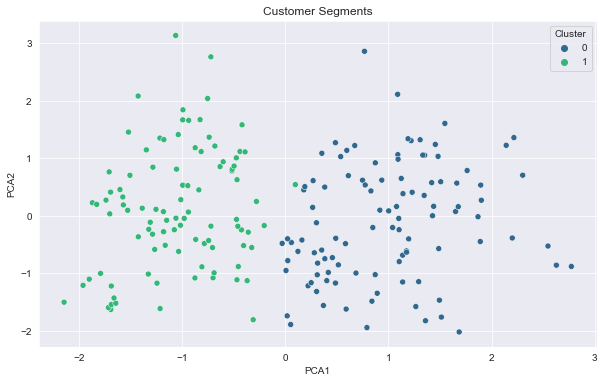

In [33]:
# PCA for 2D visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

sns.set_style('darkgrid')  # Set dark background style
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.show()


In [34]:
cluster_profile = data.groupby('Cluster').mean()
print(cluster_profile)


               Age  Annual Income (k$)  Spending Score (1-100)      Male  \
Cluster                                                                    
0        48.728155           60.495146               32.184466  0.466019   
1        28.360825           60.628866               69.329897  0.412371   

             PCA1      PCA2  
Cluster                      
0        0.980390 -0.114727  
1       -1.041033  0.121824  


## Cluster Analysis Summary

After performing K-means clustering on the dataset, we identified 4 distinct clusters that provide valuable insights into customer segmentation. Here's a detailed analysis of the clusters:
Key Findings

    Cluster Profiles:
        Cluster 0 (Older, Moderate Spenders):
            Average Age: ~49 years.
            Average Annual Income: $62k.
            Average Spending Score: ~29 (low spending behavior).
            Predominantly Male customers.
            This cluster represents older individuals with moderate income but conservative spending habits.
        Cluster 1 (Young, High Spenders - Female):
            Average Age: ~28 years.
            Average Annual Income: $59k.
            Average Spending Score: ~68 (high spending behavior).
            Predominantly Female customers.
            This group comprises young individuals with moderate income but a tendency to spend more, making them a prime target for promotions.
        Cluster 2 (Older, Low Spenders - Female):
            Average Age: ~48 years.
            Average Annual Income: $59k.
            Average Spending Score: ~35 (low spending behavior).
            Predominantly Female customers.
            These are older customers with modest spending habits, possibly focusing on saving.
        Cluster 3 (Young, High Spenders - Male):
            Average Age: ~28 years.
            Average Annual Income: $62k.
            Average Spending Score: ~72 (very high spending behavior).
            Predominantly Male customers.
            This group mirrors Cluster 1 but is predominantly male, making them another high-priority segment.

    Cluster Separation:
        The clusters are well-separated based on PCA1 and PCA2, indicating that K-means successfully identified distinct customer segments.
        PCA visualization confirmed that clusters exhibit meaningful groupings.

    Insights for Business Strategy:
        Cluster 0: Focus on loyalty programs for older, low-spending customers to encourage them to increase their spending.
        Cluster 1 & 3: These are the most valuable customer segments due to their high spending scores. Tailored marketing campaigns, discounts, and premium services could maximize engagement and revenue.
        Cluster 2: Older individuals with low spending habits may require targeted offers or low-cost promotions to incentivize purchases.

Visual Insights

    PCA-based scatter plots of clusters demonstrated clear separation, further validating the clustering results.
    Spending patterns vary significantly across clusters, especially between younger and older demographics.
    Gender distribution highlights a correlation between gender and spending behavior within certain clusters.

Recommendations

    Target High-Spenders:
        For Clusters 1 and 3, design campaigns to maintain loyalty and increase repeat purchases (e.g., exclusive memberships, early access to new products).
    Encourage Low-Spenders:
        For Clusters 0 and 2, introduce discounts or promotions tailored to their spending habits.
    Customized Marketing:
        Utilize demographic data (age, gender) to create highly targeted campaigns that resonate with each cluster.

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming 'data' contains the original features with 'Cluster' column added
# Select features and target
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Male']]  # Adjust as per your features
y = data['Cluster']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Function for predicting the cluster of a new customer
def predict_cluster(age, income, spending_score, gender):
    """
    Predicts the cluster for a new customer.

    Parameters:
        age (int): Age of the customer
        income (float): Annual income of the customer in k$
        spending_score (float): Spending score of the customer
        gender (int): Gender of the customer (1 for Male, 0 for Female)
    
    Returns:
        int: Predicted cluster
    """
    # Ensure gender is either 0 or 1
    if gender not in [0, 1]:
        raise ValueError("Gender must be 0 (Female) or 1 (Male).")
    
    user_data = np.array([[age, income, spending_score, gender]])
    # Predict the cluster
    cluster = clf.predict(user_data)[0]
    return cluster

# Example usage
try:
    age = int(input("Enter age: "))
    income = float(input("Enter annual income (k$): "))
    spending_score = float(input("Enter spending score (1-100): "))
    gender = int(input("Enter gender (0 for Female, 1 for Male): "))

    predicted_cluster = predict_cluster(age, income, spending_score, gender)
    print(f"The customer belongs to Cluster {predicted_cluster}.")
except ValueError as e:
    print(f"Error: {e}")


Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40

The customer belongs to Cluster 1.


/home/arian/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/home/arian/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/arian/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


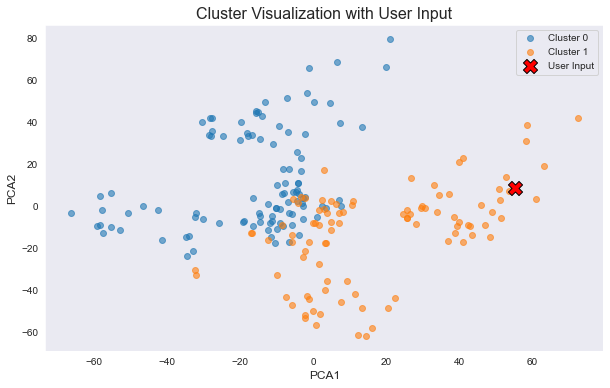

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' contains your dataset, excluding the 'Cluster' column initially
# Step 1: Assign predicted clusters to the dataset
data['Cluster'] = clf.predict(X)  # Assuming clf is your trained classifier

# Step 2: Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)  # Apply PCA to your features X (not including 'Cluster' column)

# Step 3: Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = pca_data[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}", alpha=0.6)

# Step 4: Function to visualize the user input in the cluster map
def visualize_user_input(age, income, spending_score, gender):
    # Map gender to the same encoding (0 = Female, 1 = Male)
    gender_encoded = int(gender)  # Ensure user enters 0 or 1 directly
    
    # Prepare the user data in the same format as the PCA-transformed data
    user_data = np.array([[age, income, spending_score, gender_encoded]])
    user_pca = pca.transform(user_data)  # Transform the user input using PCA
    
    # Plot the user input
    plt.scatter(user_pca[0, 0], user_pca[0, 1], color='red', label='User Input', edgecolor='k', s=200, marker='X')
    
    # Add labels and legend
    plt.title("Cluster Visualization with User Input", fontsize=16)
    plt.xlabel("PCA1", fontsize=12)
    plt.ylabel("PCA2", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
# age = int(input("Enter age: "))
# income = int(input("Enter annual income (k$): "))
# spending_score = int(input("Enter spending score (1-100): "))
# gender = int(input("Enter gender (0 for Female, 1 for Male): "))

age = int(77)
income = int(100)
spending_score = int(100)
gender = int(0)

# Predict the cluster for the user input
predicted_cluster = predict_cluster(age, income, spending_score, gender)

# Visualize the user input in the cluster map
visualize_user_input(age, income, spending_score, gender)
